## Churn In Telecom:

Business Problem:



In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score    


import matplotlib.pyplot as plt


In [2]:
#Create initial DF

df = pd.read_csv('ChurnData.csv')

In [3]:
#Checking Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#Get data set dimnensions

df.shape

(3333, 21)

In [5]:
#Get data set

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
#Famliarizing with Target Variable

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [7]:
#Further investigation of target variable

df['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

#Define X & Y

X = df.drop('churn', axis = 1)
y = df['churn']

#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
#Get numeric cols, categorical cols, and cols to frequency

#taken from: https://github.com/flatiron-school/Online-DS-PT-022221/blob/main/Phase3/complete_notebooks/32-Pipelines_complete.ipynb

num_cols = []
cols_to_ohe = []
cols_to_freq = []

for c in X_train.columns:
    # Want to grab numeric columns
    if X_train[c].dtype in ['float64', 'int64']:
        # same as if X_train[c].dtype == 'float64'
        num_cols.append(c)

    # Then grab columns with fewer than 10 unique values
    elif len(X_train[c].unique()) < 10:
        cols_to_ohe.append(c)

    # Then grab columns with more than 10, since we won't OHE those
    else:
        cols_to_freq.append(c)
        
print(f'Numeric Columns: ')
print(num_cols)
print(f'==')

print(f'OHE Columns: ')
print(cols_to_ohe)
print(f'==')

print(f'Categorical Columns that will not OHE: ')
print(cols_to_freq)

Numeric Columns: 
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
==
OHE Columns: 
['international plan', 'voice mail plan']
==
Categorical Columns that will not OHE: 
['state', 'phone number']


In [10]:
#Creating Pre Processing Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import category_encoders as ce


#Sourced From: https://github.com/flatiron-school/Online-DS-PT-022221/blob/main/Phase3/complete_notebooks/32-Pipelines_complete.ipynb

# Numerical Pre Processing Steps:

num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

#OHE Pre processing Steps:

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohencoder', OneHotEncoder(handle_unknown='ignore'))])

# Frequency Columns Pre processing Steps:

freq_transformer = Pipeline(steps=[
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('freq_enc', ce.count.CountEncoder(normalize=True, 
                                       handle_unknown=0,
                                       min_group_size=0.001,
                                       min_group_name='Other'))])

#Put all Processing Steps together in Columntransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, cols_to_ohe),
        ('freq', freq_transformer, cols_to_freq)])

In [11]:
#Fit preprocessor to X_Train data

X_train_proc = pd.DataFrame(preprocessor.fit_transform(X_train))

In [12]:
#Get feature names from processor

#Sourced from: https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html

import warnings
import sklearn
import pandas as pd

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [13]:
#Get feature names of preprocessor

processed_feature_names = get_feature_names(preprocessor)

#Assign column names to preprocessed X_train_cols

X_train_proc.columns = processed_feature_names

#transform X_test

X_test_proc = pd.DataFrame(preprocessor.transform(X_test))

<ipython-input-12-0d499a1f2f22>:38: UserWarning: Transformer num_imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-12-0d499a1f2f22>:38: UserWarning: Transformer scaler (type MinMaxScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-12-0d499a1f2f22>:38: UserWarning: Transformer ohe_imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-12-0d499a1f2f22>:38: UserWarning: Transformer freq_imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-12-0d499a1f2f22>:38: UserWarning: Transformer freq_enc (type CountEncoder) does no

In [14]:
#Get Metrics for Classifier Model Types:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def multi_model_analysis(models, weight):
    
    classifier = []
    precision = []
    recall = []
    accuracy = []
    f1 = []
    
    # Class Weight Models
    
    def get_weighted_model_metrics(reg, weight, X_train_proc, y_train, X_test_proc, y_test):

        from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score    

        model = reg(class_weight = weight)

        model.fit(X_train_proc, y_train)

        model_pred_train = model.predict(X_train_proc)

        model_pred_test = model.predict(X_test_proc)

        #Get Evaluation Metrics for DTC Train Set:

        model_train_precision = precision_score(model_pred_train, y_train)
        model_train_recall = recall_score(model_pred_train, y_train)
        model_train_accuracy = accuracy_score(model_pred_train, y_train)
        model_train_f1 = f1_score(model_pred_train, y_train)

        #Get Evaluation Metrics for DTC Test Set:

        model_test_precision = precision_score(model_pred_test, y_test)
        model_test_recall = recall_score(model_pred_test, y_test)
        model_test_accuracy = accuracy_score(model_pred_test, y_test)
        model_test_f1 = f1_score(model_pred_test, y_test)
        
        classifier.append(reg)
        precision.append(model_test_precision)
        recall.append(model_test_recall)
        accuracy.append(model_test_accuracy)
        f1.append(model_test_f1)
    
    #Non Class Weight Models
        
    def get_model_metrics(reg, X_train_proc, y_train, X_test_proc, y_test):

        from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score    

        model = reg()

        model.fit(X_train_proc, y_train)

        model_pred_train = model.predict(X_train_proc)

        model_pred_test = model.predict(X_test_proc)

        #Get Evaluation Metrics for DTC Train Set:

        model_train_precision = precision_score(model_pred_train, y_train)
        model_train_recall = recall_score(model_pred_train, y_train)
        model_train_accuracy = accuracy_score(model_pred_train, y_train)
        model_train_f1 = f1_score(model_pred_train, y_train)

        #Get Evaluation Metrics for DTC Test Set:

        model_test_precision = precision_score(model_pred_test, y_test)
        model_test_recall = recall_score(model_pred_test, y_test)
        model_test_accuracy = accuracy_score(model_pred_test, y_test)
        model_test_f1 = f1_score(model_pred_test, y_test)
        
        classifier.append(reg)
        precision.append(model_test_precision)
        recall.append(model_test_recall)
        accuracy.append(model_test_accuracy)
        f1.append(model_test_f1)
    
    for item in models:
        if item in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, SVC]:
            get_weighted_model_metrics(item, weight, X_train_proc, y_train, X_test_proc, y_test)
        else:
            get_model_metrics(item, X_train_proc, y_train, X_test_proc, y_test)
        
    metrics_df = pd.concat([pd.DataFrame(classifier), pd.DataFrame(precision), pd.DataFrame(recall), pd.DataFrame(accuracy),
              pd.DataFrame(f1)], axis = 1)
    
    metrics_df.columns = ['Classifier Model', 'Precision', 'Recall', 'Accuracy', 'F1']
    
    metrics_df.sort_values(by = 'F1', inplace = True, ascending = True)
    
    metrics_df.plot(x ='Classifier Model', y=['Precision', 'Recall', 'Accuracy', 'F1'], kind = 'barh',
                   figsize = (15, 10))
    
    plt.axvline(0.8, 0, 1, color = 'red')
    plt.title('Model Analysis Ranked by F1')

    
    return metrics_df

,Classifier Model,Precision,Recall,Accuracy,F1
2,<class 'sklearn.linear_model._logistic.Logisti...,0.166667,0.590909,0.852,0.260000
3,<class 'sklearn.svm._classes.SVC'>,0.333333,0.838710,0.886,0.477064
4,<class 'sklearn.neighbors._classification.KNei...,0.346154,0.843750,0.888,0.490909
0,<class 'sklearn.tree._classes.DecisionTreeClas...,0.743590,0.682353,0.906,0.711656
1,<class 'sklearn.ensemble._forest.RandomForestC...,0.705128,0.982143,0.952,0.820896


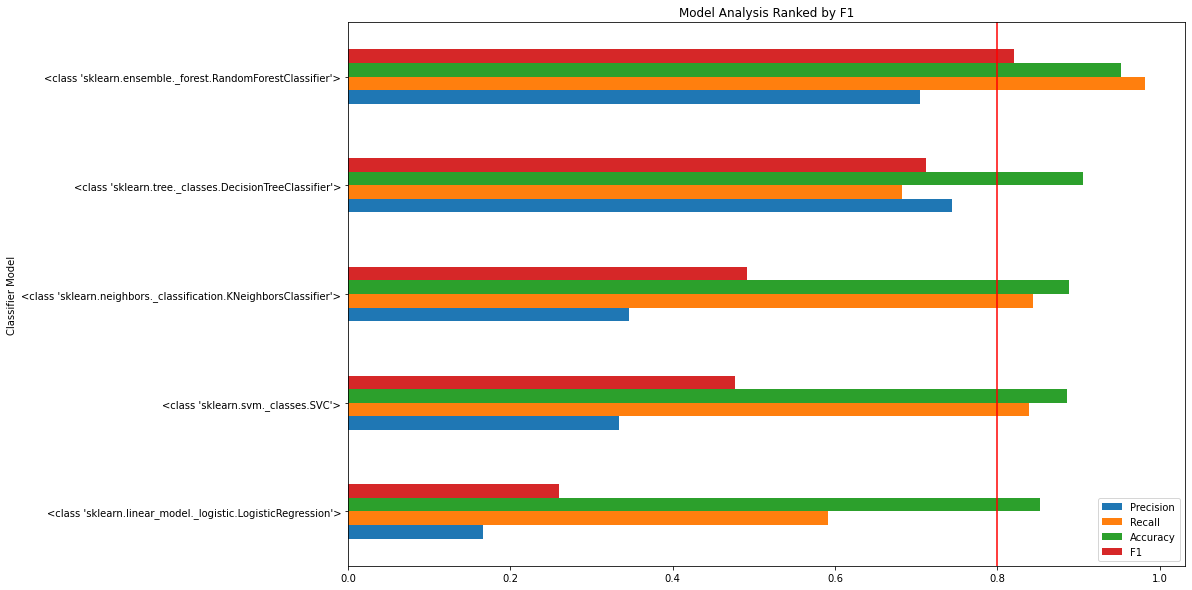

In [15]:
#Test All Models

models = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, SVC,
          KNeighborsClassifier]

multi_model_analysis(models, None)

## Initial Multi Model Findings

1. The highest F1 scores come from Decision Tree Classifiers and Decission Tree Regression
2. Random Forest Metrics are showing very promising Accuracy and Recall, however Precision is very low
3. Scores may be improved accross all models by first solving for the Class Imbalance

### Check Class Weight Imbalance

1. Multi Model Check will be run with Class Weight Imbalanced rectified

,Classifier Model,Precision,Recall,Accuracy,F1
4,<class 'sklearn.neighbors._classification.KNei...,0.346154,0.843750,0.888,0.490909
2,<class 'sklearn.linear_model._logistic.Logisti...,0.756410,0.380645,0.770,0.506438
3,<class 'sklearn.svm._classes.SVC'>,0.884615,0.570248,0.878,0.693467
0,<class 'sklearn.tree._classes.DecisionTreeClas...,0.769231,0.789474,0.932,0.779221
1,<class 'sklearn.ensemble._forest.RandomForestC...,0.692308,0.981818,0.950,0.812030


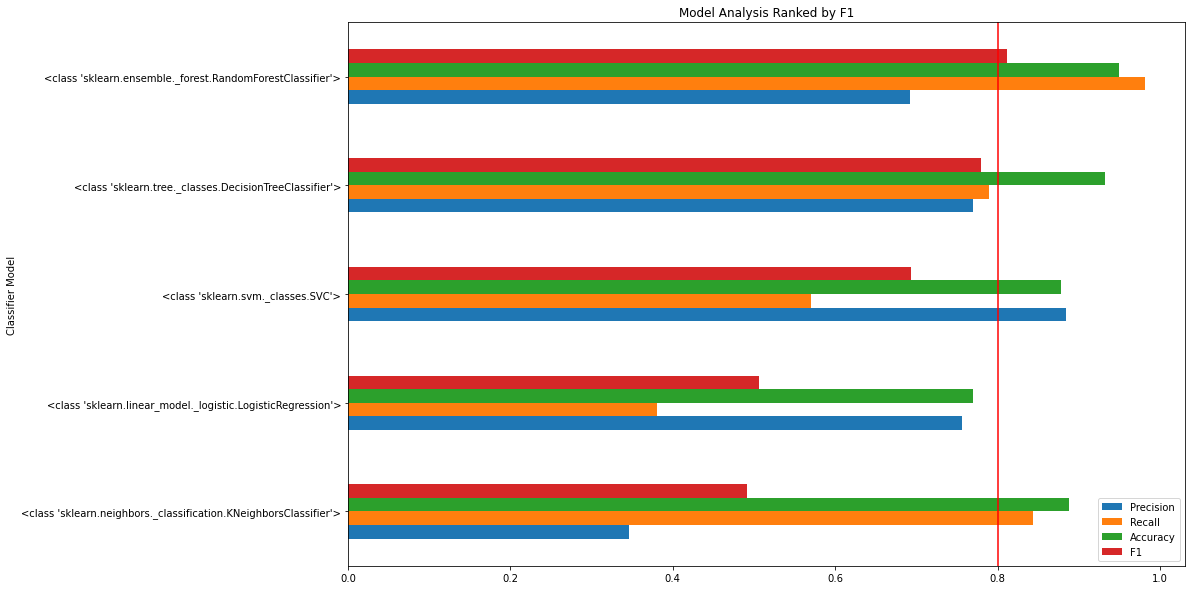

In [16]:
multi_model_analysis(models, 'balanced')

## Class Weight Analysis

1. Random Forests yielded the greatest improvement in total F1
2. Deision Tree Classifiers came in a close second
3. Logistic Regression maintained a relatively low score

### Next Steps:

1. Run CV/Grid Search on Random Forest Classifier
2. Determine feature importance


In [17]:
# #Grid Search Parameters

# # dt_param_grid = {
# #     'criterion': ['gini', 'entropy'],
# #     'max_depth': [None, 2, 3, 4, 5, 6],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 3, 4, 5, 6]
# # }

# dt_param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 3, 4, 5, 6],
#     'min_samples_split': [ 2, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6]
# }

# #Instantiate Grid Search CV

# from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(model, dt_param_grid, cv = 3, scoring = 'f1')

# grid.fit(X_train_proc, y_train)



In [18]:
# #Evaluating Metrics from Gridsearch CV:

# print(f'Best Score: {grid.best_score_}')

# #Evaluating best

# print(f'Best Parameters: {grid.best_params_}')

print(f'Best Metrics: criterion: entropy, max_depth: None, min_samples_leaf: 5, min_samples_split: 2')

Best Metrics: criterion: entropy, max_depth: None, min_samples_leaf: 5, min_samples_split: 2


Random Forest Model Metrics:

Model Test Precision: 0.8205128205128205
Model Test Recall: 0.8767123287671232
Model Test Accuracy: 0.954
Model Test F1: 0.847682119205298
---
---


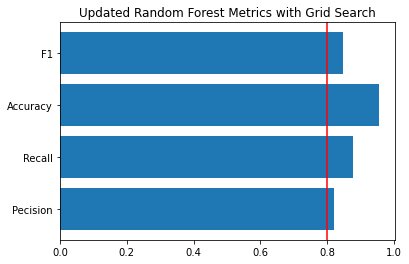

In [19]:
model = RandomForestClassifier(class_weight = 'balanced', 
                               criterion = 'entropy', 
                               max_depth = None, 
                               min_samples_leaf = 5, 
                               min_samples_split = 2)

model.fit(X_train_proc, y_train)

model_pred_train = model.predict(X_train_proc)

model_pred_test = model.predict(X_test_proc)

#Get Evaluation Metrics for DTC Train Set:

model_train_precision = precision_score(model_pred_train, y_train)
model_train_recall = recall_score(model_pred_train, y_train)
model_train_accuracy = accuracy_score(model_pred_train, y_train)
model_train_f1 = f1_score(model_pred_train, y_train)

#Get Evaluation Metrics for DTC Test Set:

model_test_precision = precision_score(model_pred_test, y_test)
model_test_recall = recall_score(model_pred_test, y_test)
model_test_accuracy = accuracy_score(model_pred_test, y_test)
model_test_f1 = f1_score(model_pred_test, y_test)

print(f'Random Forest Model Metrics:')
print(f'')
print(f'Model Test Precision: {model_test_precision}')
print(f'Model Test Recall: {model_test_recall}')
print(f'Model Test Accuracy: {model_test_accuracy}')
print(f'Model Test F1: {model_test_f1}')
print(f'---')
print(f'---')

metrics = ['Pecision', 'Recall', 'Accuracy', 'F1']
scores = [model_test_precision, model_test_recall, model_test_accuracy, model_test_f1]

plt.barh(metrics, scores)
plt.title('Updated Random Forest Metrics with Grid Search')
plt.axvline(0.8, 0, 1, color = 'red')



## Grid Search CV Results

Overall scoring has gone up significantly, with Accuracy hitting 95% and F1 increasing to 85%

### Next Steps

1. Determine Feature Importance
2. Establish final steps of qualitative analysis


<BarContainer object of 22 artists>

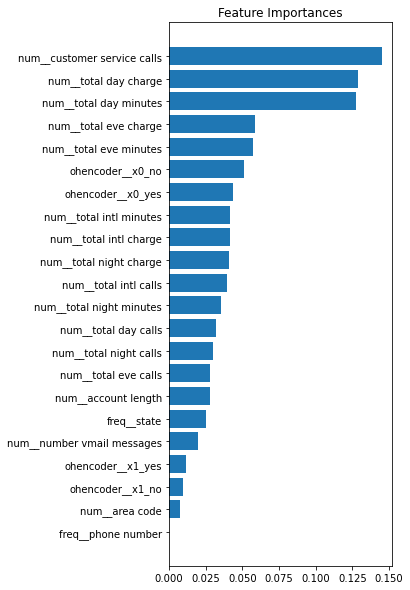

In [20]:
#Establish Feature Importance in a Dta Frame

feature_by_importance = pd.concat([pd.DataFrame(X_train_proc.columns), pd.DataFrame(model.feature_importances_)], 
                                  axis = 1)

feature_by_importance.columns = ['Feature', 'Importance']

feature_by_importance.sort_values(by='Importance', ascending = True, inplace = True)

plot = plt.figure()
plot.set_figwidth(4)
plot.set_figheight(10)

plt.title('Feature Importances')

plt.barh(feature_by_importance['Feature'],
         feature_by_importance['Importance'])

## Feature Importance Results

1. Top features include Customer Service Calls, Total Day Minutes, Total Day Charge, Total Night Minutes, Total Night Charge

2. It appears that the most active, high frequency users are most likely to churn out

### Next Steps

1. Establish average usage and point in which users are most likely to churn

In [21]:
#Service Calls Analysis

cust_service_calls_mean = np.mean(df['customer service calls'])

cust_service_calls_sd = np.std(df['customer service calls'])

non_churn_cust_service_calls_mean = np.mean(df[df['churn'] == 0]['customer service calls'])

churn_cust_service_calls_mean = np.mean(df[df['churn'] == 1]['customer service calls'])

print(f'Mean of Customer Service Calls For Non Churners: {non_churn_cust_service_calls_mean}')
print(f'Standard Deviation of Customer Service Calls: {cust_service_calls_sd}')
print(f'Mean of Customer Service Calls for Churners: {churn_cust_service_calls_mean}')

Mean of Customer Service Calls For Non Churners: 1.4498245614035088
Standard Deviation of Customer Service Calls: 1.3152936866709521
Mean of Customer Service Calls for Churners: 2.229813664596273


In [22]:
#Day Time Minutes Analysis

day_miniutes_mean = np.mean(df['total day minutes'])

day_minutes_sd = np.std(df['total day minutes'])

non_churn_day_minutes_mean = np.mean(df[df['churn'] == 0]['total day minutes'])

churn_day_minutes_mean = np.mean(df[df['churn'] == 1]['total day minutes'])

print(f'Mean of total day minutes Non Churners: {non_churn_day_minutes_mean}')
print(f'Standard Deviation of total day minutes: {day_minutes_sd}')
print(f'Mean of total day minutes for Churners: {churn_day_minutes_mean}')

Mean of total day minutes Non Churners: 175.1757543859649
Standard Deviation of total day minutes: 54.45921766392581
Mean of total day minutes for Churners: 206.91407867494823


Text(0.5, 1.0, 'Service Calls Means')

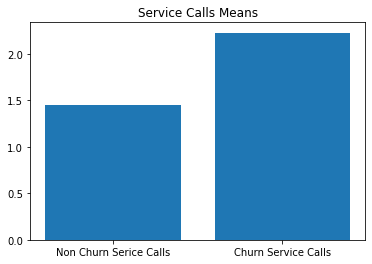

In [24]:
import matplotlib.pyplot as plt

#Service Calls Metrics

plt.bar(['Non Churn Serice Calls', 'Churn Service Calls'], [
        non_churn_cust_service_calls_mean, churn_cust_service_calls_mean])

plt.title('Service Calls Means')

Text(0.5, 1.0, 'Day Minutes Means')

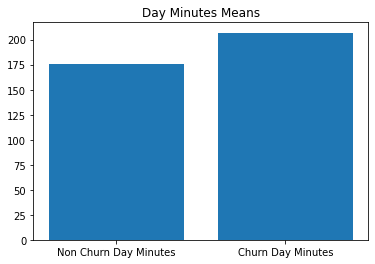

In [25]:
#Day Minutes Metrics

plt.bar(['Non Churn Day Minutes', 'Churn Day Minutes'], [
        non_churn_day_minutes_mean, churn_day_minutes_mean])

plt.title('Day Minutes Means')

## Usage Results

1. Users with higher usage during the day / charges are clearly more inclined to churn
2. This clearly shows that heavy usage users are not experiencing a satisfactory service

## Proposition

1. Provide a service that scales with usage in order to save 15% of the business
2. Specifically when a user starts exceeding 170 / 175 minutes per week offer reduce costs and a higher level of service